In [1]:
import tomographer
# Give us a nice progress bar
import tomographer.jpyutil
# Analyze the output and get quantum error bars
import tomographer.querrorbars

In [2]:
#import logging
#tomographer.cxxlogger.level = logging.NOTSET # slow things down a bit, to test for progress

In [3]:
import numpy as np

# POVM effects: projectors onto the eigenspaces of individual Pauli operators
Emn = [
    # X direction
    np.array([[1, 1],
              [1, 1]]),
    np.array([[1, -1],
              [-1, 1]]),
    # Y direction
    np.array([[1, -1j],
              [1j, 1]]),
    np.array([[1, 1j],
              [-1j, 1]]),
    # Z direction
    np.array([[1, 0],
              [0, 0]]),
    np.array([[0, 0],
              [0, 1]]),
    ]

# Frequency counts for each POVM effect in Emn
Nm = np.array([ 490, 510, 494, 506, 980, 20 ])

# for the figure of merit: reference state (must be pure to represent the fidelity-squared)
rho_ref = np.array([[1,0],[0,0]])

# run the procedure
r = None # declare r in the global scope
with tomographer.jpyutil.RandWalkProgressBar("Running random walks for the tomography procedure ... ") as prg:
    r = tomographer.tomorun.tomorun(dim=2, Nm=Nm, Emn=Emn,
                                    hist_params=tomographer.UniformBinsHistogramParams(0.9,1,50),
                                    mhrw_params=tomographer.MHRWParams(0.025,40,500,32768),
                                    fig_of_merit="obs-value",
                                    num_repeats=4,
                                    observable=rho_ref,
                                    progress_fn=prg.progress_fn)
    prg.displayFinalInfo(r['final_report_runs'])

# the result is stored in `r`:
#print(repr(r))
#print(r['final_histogram'].prettyPrint(100))
#print(r['final_report'])


In [4]:
print(r['final_histogram'].params.min, r['final_histogram'].params.max, r['final_histogram'].params.num_bins)
print(r['final_histogram'].values_center, "\n", r['final_histogram'].bins, "\n", r['final_histogram'].delta)

0.9 1.0 50
[ 0.901  0.903  0.905  0.907  0.909  0.911  0.913  0.915  0.917  0.919
  0.921  0.923  0.925  0.927  0.929  0.931  0.933  0.935  0.937  0.939
  0.941  0.943  0.945  0.947  0.949  0.951  0.953  0.955  0.957  0.959
  0.961  0.963  0.965  0.967  0.969  0.971  0.973  0.975  0.977  0.979
  0.981  0.983  0.985  0.987  0.989  0.991  0.993  0.995  0.997  0.999] 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.81469727e-05
   8.39233398e-05   1.98364258e-04   5.34057617e-04   1.43432617e-03
   3.93676758e-03   8.53729248e-03   1.80892944e-02   3.69949341e-02
   6.55517

Fit Parameters:
	a2 = 1366
	a1 = 883.2
	 m = 18.78
	 c = 89.94

Quantum Error Bars:
	   f0 = 0.98
	Delta = 0.006351
	gamma = 0.0006346



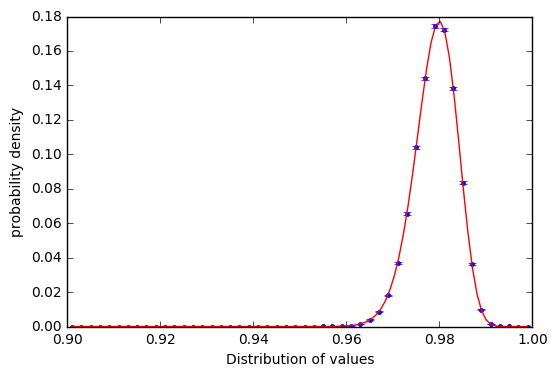

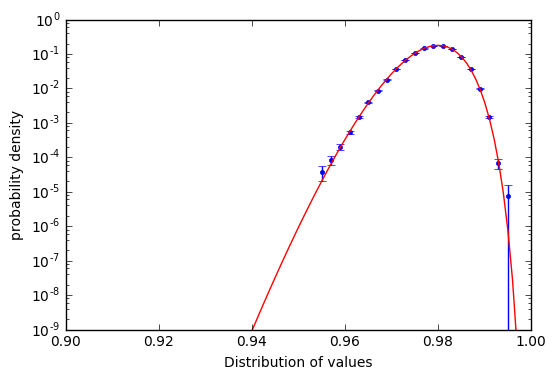

In [5]:
# Do the analysis.

analysis = tomographer.querrorbars.HistogramAnalysis(r['final_histogram'], ftox=(1,-1))

# display fit paramters
fitparams = analysis.fitParameters()
print("Fit Parameters:\n\ta2 = {a2:.4g}\n\ta1 = {a1:.4g}\n\t m = {m:.4g}\n\t c = {c:.4g}\n".format(
            a2=fitparams.a2,
            a1=fitparams.a1,
            m=fitparams.m,
            c=fitparams.c))

# display the quantum error bars (f0, Delta, gamma)
q = analysis.quantumErrorBars()
print("Quantum Error Bars:\n\t   f0 = {f0:.4g}\n\tDelta = {Delta:.4g}\n\tgamma = {gamma:.4g}\n".format(
            f0=q.f0,
            Delta=q.Delta,
            gamma=q.gamma))

# show some plots
p1 = analysis.plot() # linear scale

p2 = analysis.plot(log_scale=True, show_plot=False) # log scale
p2.ax.set_ylim([1e-9,1])
p2.show()